In [1]:
#importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


In [7]:
data = pd.read_csv('train_loan.csv')

In [8]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
#filling Null values

In [12]:
data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [13]:
data['Gender'].fillna('Male' ,inplace = True)

In [14]:
data['Married'].mode()

0    Yes
Name: Married, dtype: object

In [15]:
data['Married'].fillna('Yes' ,inplace = True)

In [16]:
data['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [17]:
data['Dependents'].fillna('0' ,inplace = True)

In [18]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [19]:
data['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [20]:
data['Self_Employed'].fillna('No' ,inplace = True)

array([[<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>]], dtype=object)

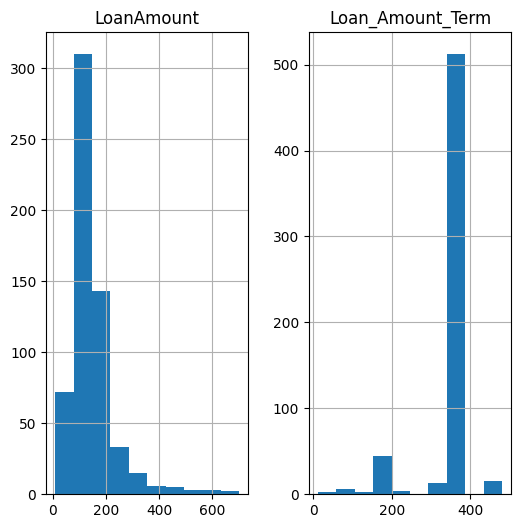

In [21]:
data[['LoanAmount','Loan_Amount_Term']].hist(figsize = (6,6))

In [22]:
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace = True)

In [23]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [24]:
data['Loan_Amount_Term'].median()

360.0

In [25]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(),inplace = True)

In [26]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [27]:
data['Credit_History'].fillna(data['Credit_History'].median(),inplace = True)

In [28]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
data['ApplicantIncome'].value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [30]:
data['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [31]:
#outlier handling
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<Axes: >

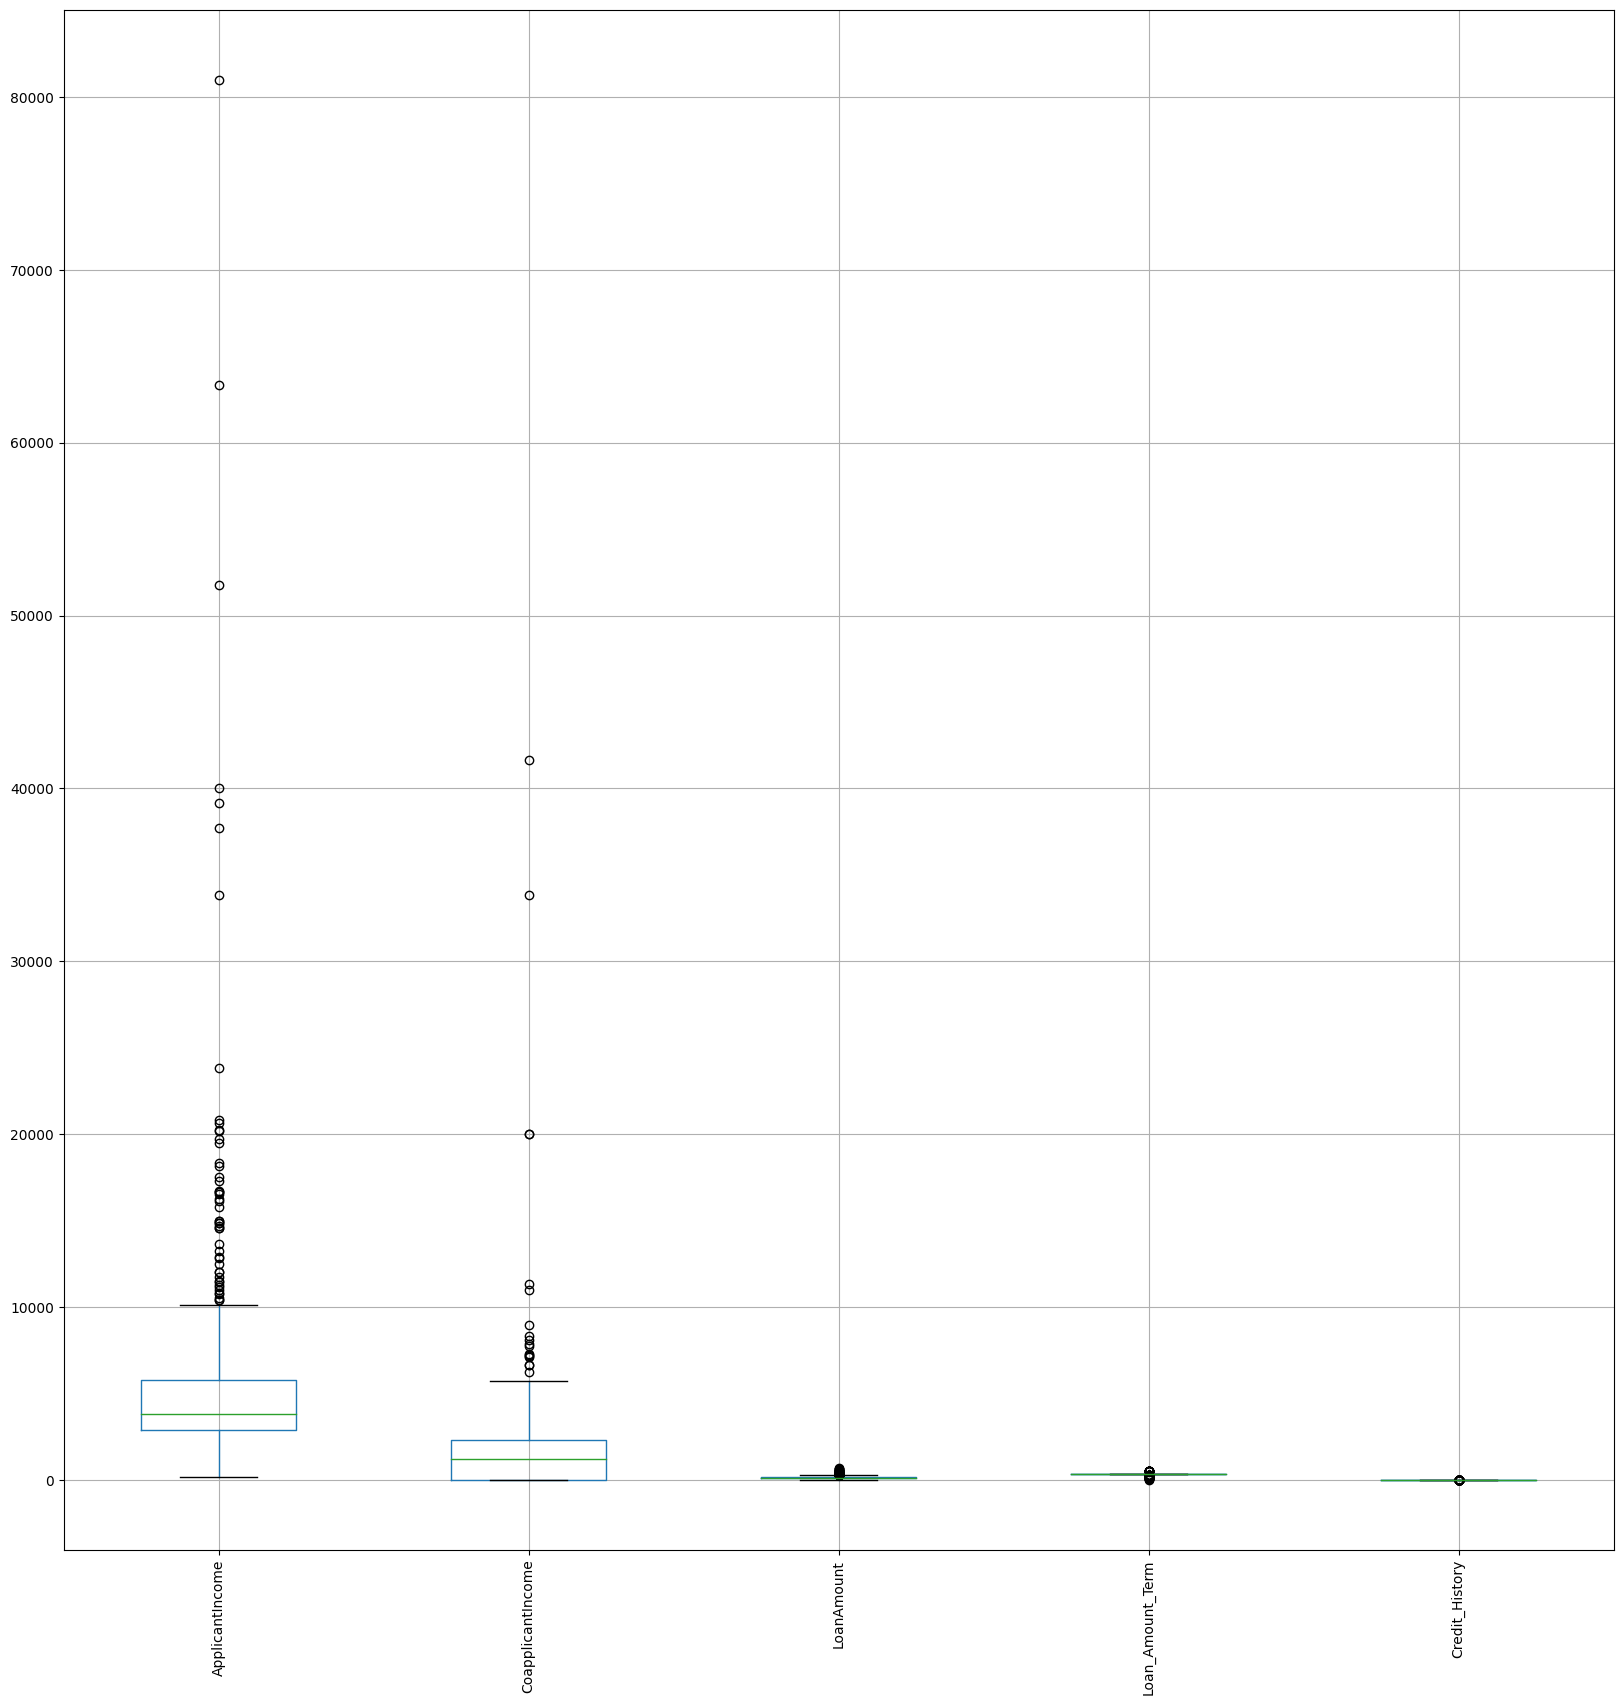

In [32]:
data.boxplot(rot = 90, figsize =(20,20))

In [33]:
'''capping outliers of Applicant Income and Coapplicant income
 will reduce the range of income to just 10000 and 5000 respectively.
 it is thus chosen to keep higher ApplicantIncome and CoapplicantIncome values like 81000 and 41667 .
 and since income can have such high values outlier capping is not done in this data set  '''
# Loan Amount and Loan term can have extreme possible values
# credit history is class of 0 or 1

'capping outliers of Applicant Income and Coapplicant income\n will reduce the range of income to just 10000 and 5000 respectively.\n it is thus chosen to keep higher ApplicantIncome and CoapplicantIncome values like 81000 and 41667 .\n and since income can have such high values outlier capping is not done in this data set  '

In [34]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [35]:
#Encoding


In [36]:
le = LabelEncoder()

In [37]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
data.drop('Loan_ID',axis = 1,inplace = True)

In [39]:
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])

In [40]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [41]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [42]:
data['Property_Area'] = data['Property_Area'].map({'Urban':3 ,'Semiurban':2 ,'Rural':1})

In [43]:
data['Property_Area'].value_counts()

2    233
3    202
1    179
Name: Property_Area, dtype: int64

In [44]:
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [45]:
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])

In [46]:
data['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [47]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [48]:
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0})

In [49]:
data['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

In [50]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [51]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [52]:
data['Dependents']= data['Dependents'].str.replace('+','')

<ipython-input-52-b06eea6b68e2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents']= data['Dependents'].str.replace('+','')


In [53]:
data['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [54]:
data['Dependents'] = data['Dependents'].astype('int32')

In [55]:
data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [56]:
data['Married'] = le.fit_transform(data['Married'])

In [57]:
data['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [58]:
data.dtypes

Gender                object
Married                int64
Dependents             int32
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [59]:
data = pd.get_dummies(data)

In [60]:
data

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male
0,0,0,1,0,5849,0.0,128.0,360.0,1.0,3,1,0,1
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0,0,1
2,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1,0,1
3,1,0,0,0,2583,2358.0,120.0,360.0,1.0,3,1,0,1
4,0,0,1,0,6000,0.0,141.0,360.0,1.0,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1,1,0
610,1,3,1,0,4106,0.0,40.0,180.0,1.0,1,1,0,1
611,1,1,1,0,8072,240.0,253.0,360.0,1.0,3,1,0,1
612,1,2,1,0,7583,0.0,187.0,360.0,1.0,3,1,0,1


In [61]:
#splitting data

In [62]:
x = data.drop(['Loan_Status'],axis = 1)
y = data['Loan_Status']

In [63]:
#scaling is not done for CART algorithms like Descision tree Classifiers

In [64]:
# splitting the dataset into training data and testing data

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 42)

In [66]:
#Random Forest

In [67]:
nest = [50 , 100, 150, 200, 250, 300, 350, 400, 450, 500]
acc_scr = []
for i in nest:
  rf_clf = RandomForestClassifier(n_estimators = i, random_state=42)
  rf_clf.fit(x_train,y_train)
  y_pred_rf = rf_clf.predict(x_test)
  acc_scr.append(accuracy_score(y_test,y_pred_rf))


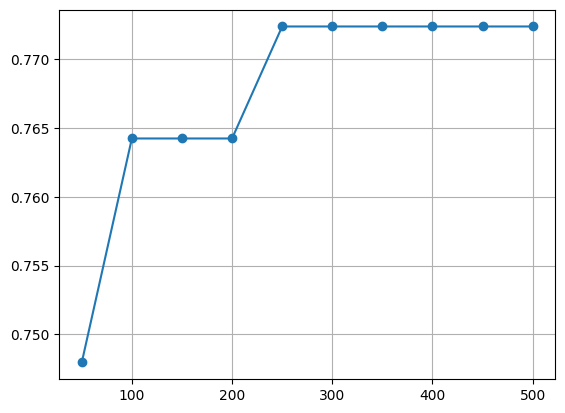

In [68]:
plt.plot(nest,acc_scr,'o-')
plt.grid()

In [69]:
#at n_estimators = 250, we get max accuracy

In [70]:
rf_clf = RandomForestClassifier(n_estimators = 250, random_state=42)


In [71]:
rf_clf.fit(x_train,y_train)


RandomForestClassifier(n_estimators=250, random_state=42)

In [72]:
y_pred_rf = rf_clf.predict(x_test)

In [73]:
accuracy_score(y_test,y_pred_rf)

0.7723577235772358

In [74]:
#Bagging

In [75]:
nest_bg = [50 , 100, 150, 200, 250, 300, 350, 400, 450, 500]

In [76]:
#bagging with descision trees

In [77]:
dt_clf = DecisionTreeClassifier()

In [78]:
acc_bag_dt = []
for i in nest_bg:
  bg_clf = BaggingClassifier(estimator=dt_clf,n_estimators=i,random_state=42)
  bg_clf.fit(x_train,y_train)
  y_pred_bag_dt = bg_clf.predict(x_test)
  acc_bag_dt.append(accuracy_score(y_test,y_pred_bag_dt))



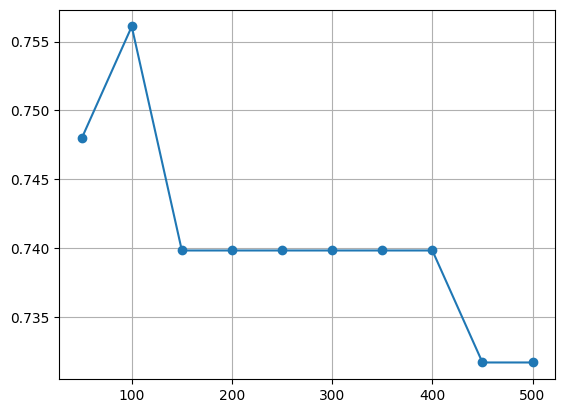

In [79]:
plt.plot(nest_bg,acc_bag_dt,'o-')
plt.grid()

In [80]:
# highest accuracy score of bagging with descision tree was at n_estimators = 100

In [81]:
bg_clf = BaggingClassifier(estimator=dt_clf,n_estimators=100,random_state=42)


In [82]:
bg_clf.fit(x_train,y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [83]:
y_pred_bag_dt = bg_clf.predict(x_test)
accuracy_score(y_test,y_pred_bag_dt)

0.7560975609756098

In [84]:
#scaling before bagging with svm, Logistic regression, knn and NaiveBayers

In [85]:
x1 = x
y1 = y

In [86]:
minmax = MinMaxScaler()

In [87]:
x1.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = minmax.fit_transform(x1[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [88]:
x1.describe()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.653094,0.744300,0.781759,0.133550,0.064978,0.038910,0.197905,0.706005,0.855049,2.037459,0.182410,0.817590
std,0.476373,1.009623,0.413389,0.340446,0.075560,0.070229,0.121718,0.137668,0.352339,0.787482,0.386497,0.386497
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.033735,0.000000,0.132055,0.743590,1.000000,1.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.045300,0.028524,0.172214,0.743590,1.000000,2.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.069821,0.055134,0.225398,0.743590,1.000000,3.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


In [89]:
x_train_1,x_test_1,y_train_1,y_test_1  = train_test_split(x1,y1,test_size = 0.2 ,random_state = 42)

In [90]:
#bagging with svm

In [91]:
svm = SVC()

In [92]:
acc_bag_svm = []
for i in nest_bg:
  bg_clf = BaggingClassifier(estimator=svm ,n_estimators=i ,random_state=42)
  bg_clf.fit(x_train_1,y_train_1)
  y_pred_bag_svm = bg_clf.predict(x_test_1)
  acc_bag_svm.append(accuracy_score(y_test_1,y_pred_bag_svm))

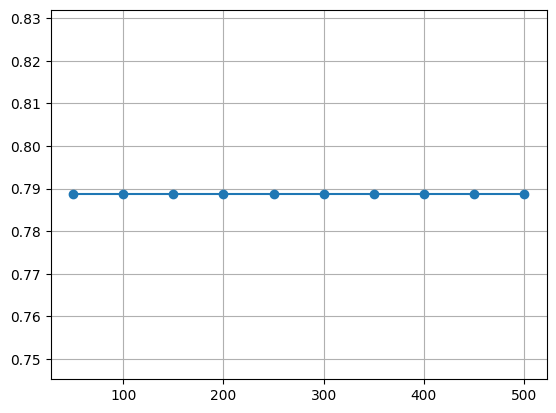

In [93]:
plt.plot(nest_bg,acc_bag_svm,'o-')
plt.grid()

In [94]:
#same accuracy for all values of n-estimators

In [95]:
bg_clf = BaggingClassifier(estimator=svm ,n_estimators=50 ,random_state=42)


In [96]:
bg_clf.fit(x_train_1,y_train_1)


BaggingClassifier(estimator=SVC(), n_estimators=50, random_state=42)

In [97]:
y_pred_bag_svm = bg_clf.predict(x_test_1)


In [98]:
accuracy_score(y_test_1,y_pred_bag_svm)

0.7886178861788617

In [99]:
#bagging with logistic regression

In [100]:
log_reg = LogisticRegression()

In [101]:
acc_bag_log = []
for i in nest_bg:
  bg_clf = BaggingClassifier(estimator=log_reg ,n_estimators=i ,random_state=42)
  bg_clf.fit(x_train_1,y_train_1)
  y_pred_bag_log = bg_clf.predict(x_test_1)
  acc_bag_log.append(accuracy_score(y_test_1,y_pred_bag_log))

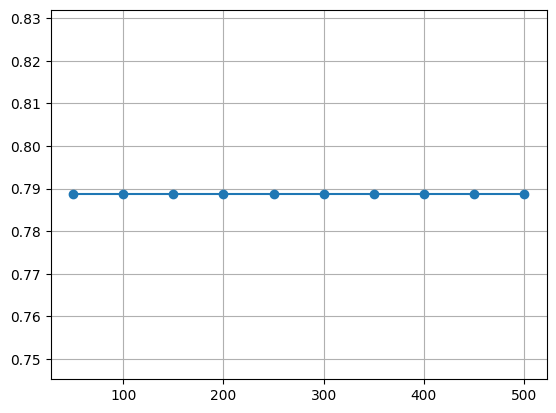

In [102]:
plt.plot(nest_bg,acc_bag_log,'o-')
plt.grid()

In [103]:
#same accuracy for all values of n-estimators

In [104]:
bg_clf = BaggingClassifier(estimator=log_reg ,n_estimators= 50 ,random_state=42)
bg_clf.fit(x_train_1,y_train_1)
y_pred_bag_log = bg_clf.predict(x_test_1)


In [105]:
accuracy_score(y_test_1,y_pred_bag_log)

0.7886178861788617

In [106]:
#bagging with KNN

In [107]:
knn = KNeighborsClassifier(n_neighbors = 12, metric = 'minkowski',p = 1)

In [108]:
bg_clf = BaggingClassifier(estimator=knn ,n_estimators= 50 ,random_state=42)
bg_clf.fit(x_train_1,y_train_1)
y_pred_bag_knn = bg_clf.predict(x_test_1)

In [109]:
accuracy_score(y_test_1,y_pred_bag_knn)

0.7398373983739838

In [110]:
#bagging with Naive Bayers

In [111]:
nb = GaussianNB()

In [112]:
bg_clf = BaggingClassifier(estimator= nb ,n_estimators= 50 ,random_state=42)
bg_clf.fit(x_train_1,y_train_1)
y_pred_bag_nb = bg_clf.predict(x_test_1)

In [113]:
accuracy_score(y_test_1,y_pred_bag_nb)

0.7804878048780488

In [114]:
#Boosting

In [115]:
#AdaBoost

In [116]:
ada_clf = AdaBoostClassifier(n_estimators=100,random_state=42)

In [117]:
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [118]:
y_pred_ada = ada_clf.predict(x_test)

In [119]:
accuracy_score(y_test,y_pred_ada)

0.7560975609756098

In [120]:
#Gradientboost

In [121]:
gb_clf = GradientBoostingClassifier(n_estimators=50,max_depth=2,random_state=42)

In [122]:
gb_clf.fit(x_train,y_train)


GradientBoostingClassifier(max_depth=2, n_estimators=50, random_state=42)

In [123]:
y_pred_gb = gb_clf.predict(x_test)

In [124]:
accuracy_score(y_test,y_pred_gb)

0.7886178861788617

In [125]:
#XGBoost

In [126]:
#calculating optimum parameter values

In [127]:
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
acc_scr_with_alpha = []
for i in alpha:
  xgb_clf = xgb.XGBClassifier(n_estimators=100 ,max_depth = 1, random_state = 42, learning_rate = i )
  xgb_clf.fit(x_train,y_train)
  y_pred_xgb = xgb_clf.predict(x_test)
  acc_scr_with_alpha.append(accuracy_score(y_test,y_pred_xgb))



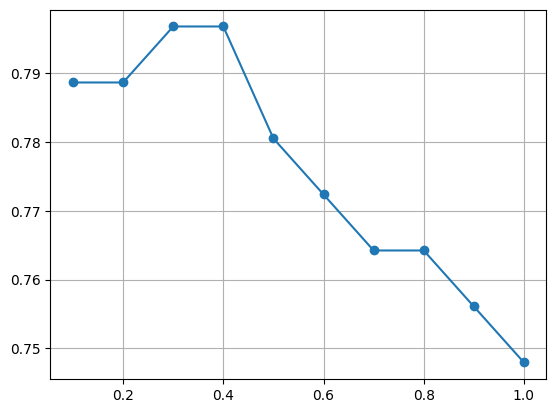

In [128]:
plt.plot(alpha,acc_scr_with_alpha,'o-')
plt.grid()

In [129]:
estm = [20,30,50,100,150,200,250,300,350,400,450,500]
acc_scr_with_estm = []
for i in estm:
  xgb_clf = xgb.XGBClassifier(n_estimators=i ,max_depth = 1, random_state = 42, learning_rate = 0.4)
  xgb_clf.fit(x_train,y_train)
  y_pred_xgb = xgb_clf.predict(x_test)
  acc_scr_with_estm.append(accuracy_score(y_test,y_pred_xgb))


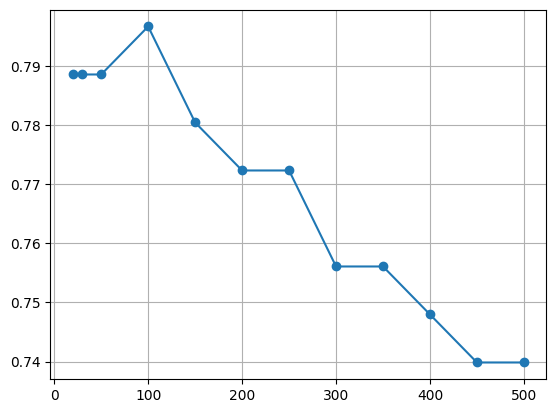

In [130]:
plt.plot(estm,acc_scr_with_estm,'o-')
plt.grid()

In [131]:
gamma = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
acc_scr_with_gamma= []
for i in gamma:
  xgb_clf = xgb.XGBClassifier(n_estimators=100 ,max_depth = 1, random_state = 42, learning_rate = 0.4, gamma = i)
  xgb_clf.fit(x_train,y_train)
  y_pred_xgb = xgb_clf.predict(x_test)
  acc_scr_with_gamma.append(accuracy_score(y_test,y_pred_xgb))


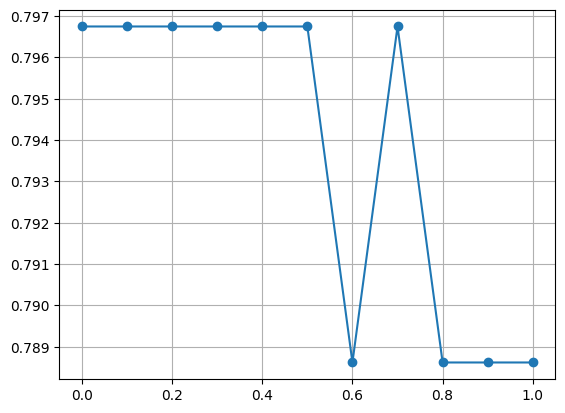

In [132]:
plt.plot(gamma,acc_scr_with_gamma,'o-')
plt.grid()

In [133]:
depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
acc_scr_with_depth = []
for i in depth:
  xgb_clf = xgb.XGBClassifier(n_estimators=100 ,max_depth = i, random_state = 42, learning_rate = 0.4, gamma =0.1, )
  xgb_clf.fit(x_train,y_train)
  y_pred_xgb = xgb_clf.predict(x_test)
  acc_scr_with_depth.append(accuracy_score(y_test,y_pred_xgb))


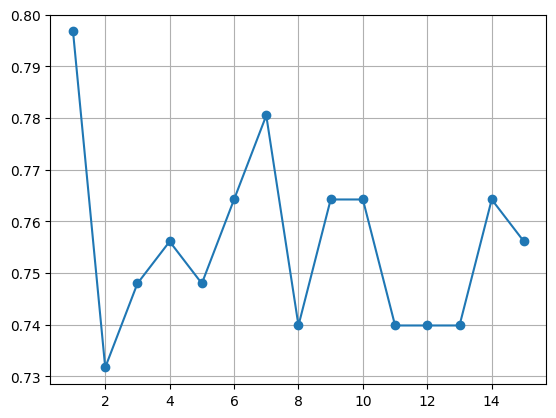

In [134]:
plt.plot(depth,acc_scr_with_depth,'o-')
plt.grid()

In [135]:
#creating a fine tuned xgboostmodel with optimum parameters

In [136]:
xgb_clf = xgb.XGBClassifier(n_estimators=100 ,max_depth = 1, random_state = 42, learning_rate = 0.4, gamma = 0.1 )

In [137]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [138]:
y_pred_xgb = xgb_clf.predict(x_test)

In [139]:
accuracy_score(y_test,y_pred_xgb)

0.7967479674796748

In [140]:
#highest accuracy score out of all the ensemble models was given by XGBoost model at 79.674%